In [229]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [230]:
def show_image(window_name, image, cmap=None):
    if image is None:
        print(f"{window_name}: imagem nao carregada (None)")
        return

    if len(image.shape) == 3 and image.shape[2] == 3:
        img_disp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        img_disp = image
        if cmap is None:
            cmap = 'gray'
    plt.figure(figsize=(8, 6))
    plt.title(window_name)
    plt.axis('off')
    plt.imshow(img_disp, cmap=cmap)
    plt.show()

def close_all_windows():
    pass

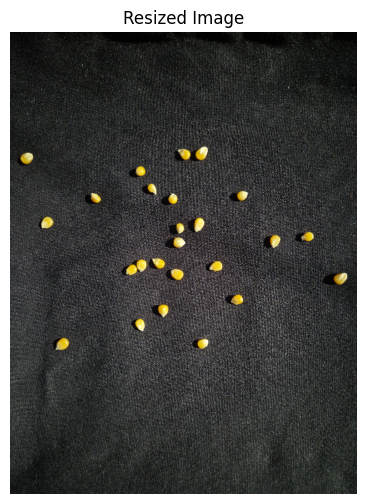

In [231]:
img = cv2.imread('imagens/20251115_153252.jpg')
img = cv2.resize(img, (600, 800))
show_image("Resized Image", img)

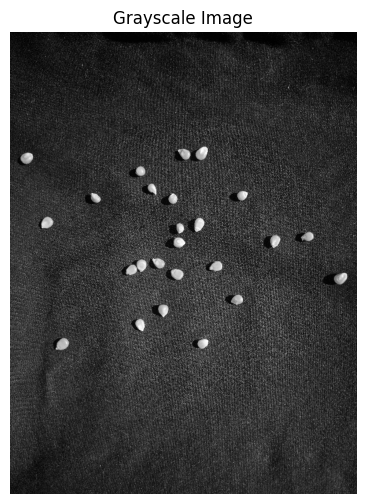

In [232]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image("Grayscale Image", gray)

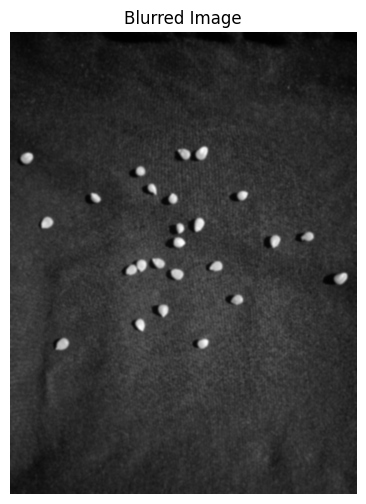

In [233]:
blur = cv2.GaussianBlur(gray, (7, 7), 0)
show_image("Blurred Image", blur)

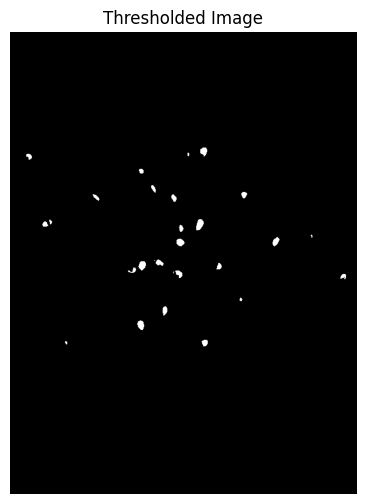

In [234]:
_, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)
show_image("Thresholded Image", thresh)

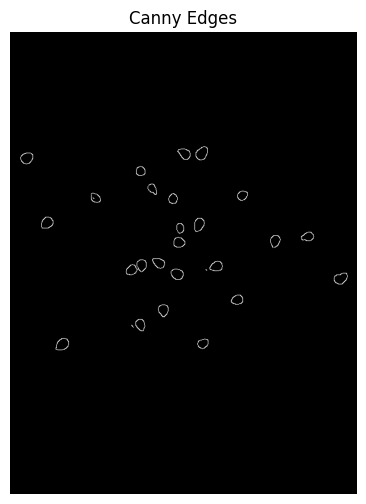

In [235]:
canny1 = cv2.Canny(blur, 180, 200)
show_image("Canny Edges", canny1)

Objetos detectados: 28


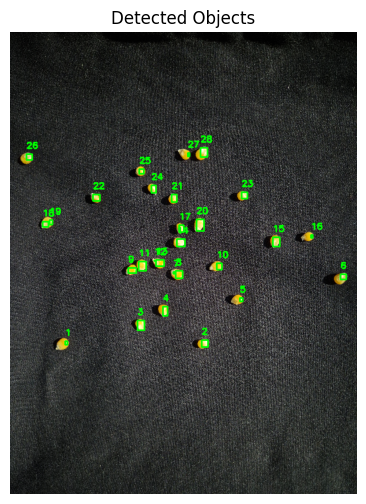

In [236]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    cv2.putText(img, f"{i+1}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
print("Objetos detectados:", len(contours))
show_image("Detected Objects", img)